In [116]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench.analysis import parcoords

In [117]:
# Import problem formulation
from problem_formulation import get_model_for_problem_formulation

# Define model
dike_model, planning_steps = get_model_for_problem_formulation(3)

INFO:dike_model_function:Model initialized


# Directed search: MORDM Generating alternatives 
The results of the open exploration can be used as a base for Multi-Objective Robust Decision Making(MORDM) this will help identify robust strategies that perform well across a range of deeply uncertain future scenarios. This notebook uses MORDM to generate alternatives that will later be executed in the model. The notebook is structured as follows 

- Determining the reference scenario's 
- Interpreting the MORDM 
- Selecting interesting policies

## 1. Determining reference scenarios

Dike Ring 4 is primarily focused on minimizing local flood impacts, prioritizing policies that prevent flooding and reduce potential damage and fatalities within our jurisdiction. Given that Dike Ring 4 is not isolated and operates within a region of shared resources and funding constraints, we recognize the importance of holistic regional planning.

While the primary focus of dike ring 4 is the safety and security of their own dike ring, it is also the casethat the costs associated with enhancing dikes need careful consideration. If these costs prove to be prohibitively high, seeking compensation could be a viable alternative. However, this strategy is not stable upon ensuring that it does not lead to an unacceptable increase in risk or fatalities. Therefore, any decision will be made with a careful balance of cost, risk, and inter-regional cooperation to ensure the best outcomes for Dike Ring 4 while considering broader regional priorities.

Combining this information means that multiple results can be beneficial for our dike ring. these are: 

- No Annual Damage in our dike ring and No Deaths in our dike ring. 
- Annual Damage in our dike ring is lower than the compensation we recieve, still no Deaths

This means that alternatives are also interesting if the dike investment costs are high and the annual damage is low. This means that we have to look at regret as well when determining our alternatives. 

In [118]:
#Import CSV files
experiments_zero = pd.read_csv('data/output/open_exploration_experiments_zero.csv')
outcomes_zero = pd.read_csv('data/output/open_exploration_outcomes_zero.csv')

In [119]:
#define worst outcomes as the outcomes in which the deaths and the damage in dike ring 4 are in the highest 90%
worst_outcomes = outcomes_zero[
    (outcomes_zero['A.4_Expected Annual Damage'] >
       np.percentile(outcomes_zero['A.4_Expected Annual Damage'],90))&(outcomes_zero['A.4_Expected Number of Deaths'] >
       np.percentile(outcomes_zero['A.4_Expected Number of Deaths'],90))
]# define the worst outcomes as the outcomes in which the deaths and damage in dike ring 4 are in the highest 10%

In [120]:
# Merge dataframes
combined_worstoutcomes = pd.merge(worst_outcomes, experiments_zero,
                                  left_index=True, right_index=True)

# Sort dataframe
combined_worstoutcomes.sort_values(by=['A.4_Expected Annual Damage', 'A.4_Expected Annual Damage'], ascending=False)

,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy_y,model
19432,0.000000e+00,0,0.000000,1.970672e+07,0,0.014703,1.179425e+08,0,0.161484,2.425206e+08,...,0,0,0,0,0,0,0,19432,policy 0,dikesnet
19490,0.000000e+00,0,0.000000,1.970032e+07,0,0.014694,2.455704e+08,0,0.332033,2.408598e+08,...,0,0,0,0,0,0,0,19490,policy 0,dikesnet
11116,1.226211e+08,0,0.065811,1.264924e+08,0,0.089408,1.224183e+07,0,0.016463,2.363850e+08,...,0,0,0,0,0,0,0,11116,policy 0,dikesnet
3997,4.822106e+07,0,0.026237,3.561417e+07,0,0.026224,2.447375e+08,0,0.330004,2.329822e+08,...,0,0,0,0,0,0,0,3997,policy 0,dikesnet
2719,2.391877e+07,0,0.013055,3.551951e+07,0,0.026092,2.441281e+08,0,0.328520,2.327444e+08,...,0,0,0,0,0,0,0,2719,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,1.852495e+06,0,0.001416,2.567155e+07,0,0.026368,1.761515e+08,0,0.330836,7.412599e+07,...,0,0,0,0,0,0,0,3785,policy 0,dikesnet
1004,3.411244e+07,0,0.025757,2.553918e+07,0,0.026110,0.000000e+00,0,0.000000,7.411238e+07,...,0,0,0,0,0,0,0,1004,policy 0,dikesnet
331,0.000000e+00,0,0.000000,9.419163e+06,0,0.009778,8.457125e+07,0,0.160805,7.405956e+07,...,0,0,0,0,0,0,0,331,policy 0,dikesnet
10287,0.000000e+00,0,0.000000,3.824518e+07,0,0.043593,1.528402e+07,0,0.033126,7.400934e+07,...,0,0,0,0,0,0,0,10287,policy 0,dikesnet


In [121]:
#outcome 19432 is the worst outcome based on the earlier defined requirements
combined_worstoutcomes.loc[19432,'A.0_ID flood wave shape':'discount rate 2']

A.0_ID flood wave shape            35
A.1_Bmax                   124.161608
A.1_Brate                        10.0
A.1_pfail                    0.972902
A.2_Bmax                   208.516404
A.2_Brate                         1.0
A.2_pfail                    0.940094
A.3_Bmax                   184.814021
A.3_Brate                        10.0
A.3_pfail                    0.733796
A.4_Bmax                   318.749226
A.4_Brate                         1.0
A.4_pfail                    0.005997
A.5_Bmax                   216.896388
A.5_Brate                         1.5
A.5_pfail                    0.043729
discount rate 0                   1.5
discount rate 1                   1.5
discount rate 2                   1.5
Name: 19432, dtype: object

# 2 Analysing the Results

Following the identification of outcome 19432 as the critical worst-case scenario, we executed the MORDM.py script with these values as the reference. This analysis generated results, which were subsequently loaded into the results and convergence files. The results file provided valuable insights, particularly regarding dike ring 4. However, focusing solely on the data for dike ring 4 does not provide a comprehensive basis for persuading policymakers of the robustness and efficacy of our proposed solutions.

## Enhancing the Results Framework

To strengthen our analysis and align it more closely with the MORDM principles of multi-criteria decision support, we introduced two additional columns to the results dataframe:

- **Total Damage in Other Dike Rings:** This column aggregates the damage across dike rings 1, 2, 3, and 5. Considering that robust policies often require broad support from various stakeholders, assessing the damage across all dike rings is crucial. This metric underscores the importance of maintaining low damage levels across the entire region, enhancing the appeal and feasibility of the policy to broader stakeholder groups.

- **Total Dike Investment Costs:** This column sums the total investment costs across all dike rings. Given that financial feasibility is a critical component of policy acceptance, it is essential to evaluate the overall investment required. Understanding the total investment costs helps in assessing the economic viability of the proposed solutions and aids in prioritizing investments in a manner that balances cost-effectiveness with risk mitigation.


In [122]:
# Import CSV files generated in dike_model_optimization
results = pd.read_csv('data/Output/MOEA_10000_results.csv')
convergence = pd.read_csv('data/Output/MOEA_10000_convergence.csv')

In [123]:
# Adding a new column to the results DataFrame that aggregates the total damage across dike rings 1, 2, 3, and 5. This helps in evaluating the overall impact on the entire region, not just dike ring 4.
results['Total Damage Other Dike Rings'] = (
    results['A.1_Expected Annual Damage'] +
    results['A.2_Expected Annual Damage'] +
    results['A.3_Expected Annual Damage'] +
    results['A.5_Expected Annual Damage']
)

In [124]:
# Adding a new column to the results DataFrame that sums the total investment costs across all dike rings (1, 2, 3, 4, and 5). This helps in evaluating the overall financial feasibility and economic viability of the proposed solutions.
results['Total Dike Investment Costs'] = (
    results['A.1_Dike Investment Costs'] +
    results['A.2_Dike Investment Costs'] +
    results['A.3_Dike Investment Costs'] +
    results['A.4_Dike Investment Costs'] +
    results['A.5_Dike Investment Costs']
)

In [125]:
# For more insightful visualizations, only the relevant columns were stored in the DataFrame. This selection focuses on key metrics that are critical for analysis and decision-making.

columns_to_keep = [
    'A.4_Expected Annual Damage', 
    'A.4_Dike Investment Costs', 
    'A.4_Expected Number of Deaths',  
    'RfR Total Costs', 
    'Expected Evacuation Costs', 
    'Total Damage Other Dike Rings',
    'Total Dike Investment Costs'
]

relevant_results = results[columns_to_keep]

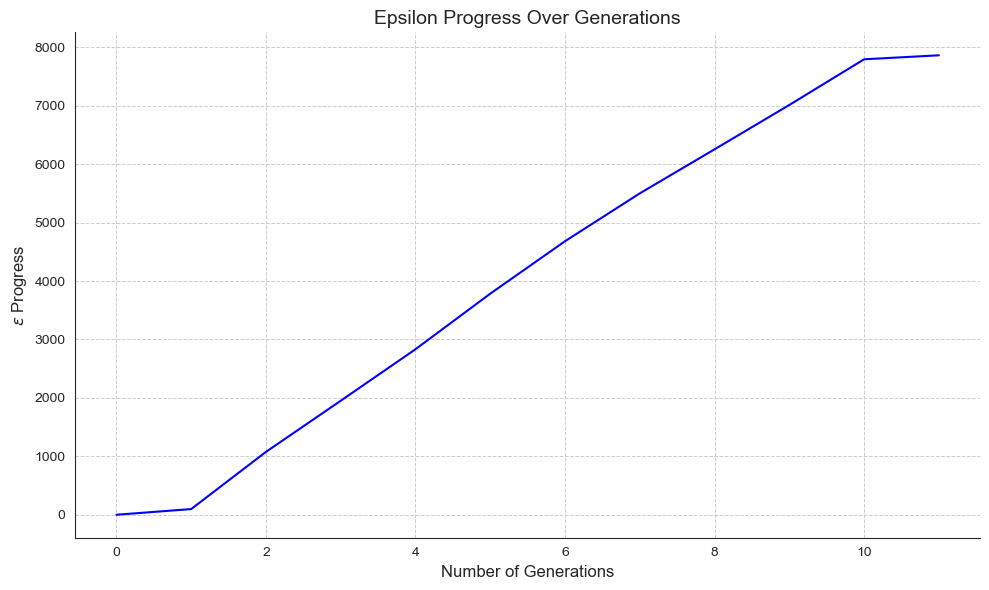

In [126]:
#Plot of the epsilon progress
fig, ax = plt.subplots(figsize=(10, 6))  

ax.plot(convergence.epsilon_progress, linestyle='-', color='b')  # Add markers and change color
ax.set_xlabel("Number of Generations", fontsize=12)
ax.set_ylabel(r"$\epsilon$ Progress", fontsize=12)
ax.set_title("Epsilon Progress Over Generations", fontsize=14)

# Adding grid lines for better readability
ax.grid(True, linestyle='--', linewidth=0.7)

sns.despine()
plt.tight_layout()
plt.show()

The graph above shows the epsilon progress over generations during an optimization process. 

- **Y-axis (Epsilon Progress):** Represents the degree of improvement in the objective functions between generations. Higher values indicate significant improvements, while lower values suggest less improvement or convergence.
- **X-axis (Number of Generations):** Represents the number of generations or iterations in the optimization process.

#### Key Observations:

1. **Initial Generations (0-1):**
   - There is a small increase in epsilon progress, indicating minimal improvements initially. This is typical as the optimization algorithm begins exploring the decision space.

2. **Middle Generations (2-6):**
   - A steady and substantial increase in epsilon progress suggests significant improvements are being made with each generation.

3. **Later Generations (7-10):**
   - The epsilon progress continues to increase but at a slightly  slower rate, indicating that the optimization process is starting to converge, with fewer new improvements being found. However this increase is so small that more generations could be beneficial however time and resources are limited in this project. This lead to the choice to not optimalize any more than this

4. **Last generation(11)**  
    - The epsilon progress still rises for generation 11 but at a much lower pace, this can be an indication of fewer new imporovements being found. However, since the nfe was set at 10.000 the increase of this run is much lower. Still, due to time and computing constraints the choice was made to leave the nfe at 10.000 

In [127]:
#relevant columns for our research
relevant_columns = [
    'A.4_Expected Annual Damage', 
    'A.4_Dike Investment Costs', 
    'A.4_Expected Number of Deaths', 
    'RfR Total Costs', 
    'Expected Evacuation Costs',
    'Total Damage Other Dike Rings', 
    'Total Dike Investment Costs'
]

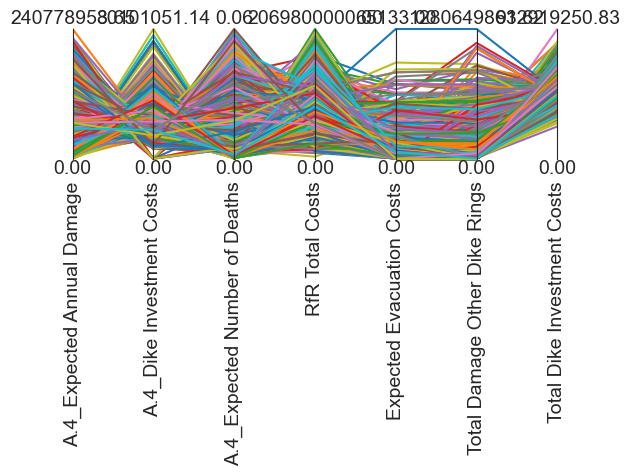

In [128]:
# only take the relevant columns to make the results more insightfull
relevant_data = relevant_results[relevant_columns]

# Define limits based on the filtered dataframe
limits = parcoords.get_limits(relevant_data)
limits.head()

# Set zero limits for all columns to create more insightfull visualisations
limits.loc[0, ['A.4_Expected Annual Damage', 
    'A.4_Dike Investment Costs', 
    'A.4_Expected Number of Deaths', 
    'RfR Total Costs', 
    'Expected Evacuation Costs'
    ,'Total Damage Other Dike Rings',
    'Total Dike Investment Costs']] = 0

# Set axes of parallel coordinate plots
paraxes = parcoords.ParallelAxes(limits)

# Plot data on axis
paraxes.plot(relevant_data)

# Display the plot
plt.show()

# Interpretation
Due to the high amount of alternatives displayed in this plot the visualisation is not very insightfull. The only insights that can be gathered is that there is only one alternative that leads to extremely high evacuation costs.

In [129]:
# Select only outcomes of MOEA
outcomes_MOEA = results.loc[:, [o.name for o in dike_model.outcomes]]

# Print descriptives
outcomes_MOEA.describe()

,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
count,4600.0,4.600000e+03,4600.0,4.600000e+03,4.600000e+03,4600.000000,4.600000e+03,4.600000e+03,4600.000000,4.600000e+03,4.600000e+03,4600.000000,4.600000e+03,4.600000e+03,4600.000000,4.600000e+03,4600.000000
mean,0.0,1.346827e+08,0.0,3.100449e+05,1.590474e+08,0.000107,1.891003e+06,8.944874e+07,0.001236,4.070538e+07,2.819686e+07,0.006207,6.257998e+07,9.077731e+07,0.019279,9.611927e+08,2951.069571
std,0.0,4.734317e+07,0.0,1.214537e+06,4.968662e+07,0.000553,5.363822e+06,2.134392e+07,0.004836,4.305427e+07,1.115661e+07,0.009675,1.240931e+08,2.776079e+07,0.051053,3.420333e+08,4929.161985
min,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,3.070000e+07,0.000000
25%,0.0,1.014745e+08,0.0,0.000000e+00,1.213148e+08,0.000000,0.000000e+00,7.697874e+07,0.000000,6.388880e+06,1.974216e+07,0.000721,0.000000e+00,6.929997e+07,0.000000,7.163000e+08,0.000000
50%,0.0,1.364230e+08,0.0,0.000000e+00,1.612189e+08,0.000000,0.000000e+00,9.002725e+07,0.000000,2.698094e+07,2.793940e+07,0.002100,8.897317e+06,9.347787e+07,0.001450,9.528000e+08,1175.724507
75%,0.0,1.668091e+08,0.0,0.000000e+00,1.931317e+08,0.000000,0.000000e+00,1.034875e+08,0.000000,6.009464e+07,3.567482e+07,0.006954,6.444024e+07,1.093028e+08,0.014287,1.203000e+09,3845.497663
max,0.0,3.394164e+08,0.0,1.182072e+07,3.950553e+08,0.008792,1.149742e+08,1.765099e+08,0.083110,2.407790e+08,8.010105e+07,0.063722,1.280650e+09,2.155111e+08,0.705384,2.069800e+09,65132.996162


# Which policies might me interesting? 
there are several ways in which a policy can be interesting. In the case of our dike ring the most relevant result was the annual damage in our dike ring. Therefore it makes sense to look at the policies that lead to 0 damage in our dike ring

In [130]:
selected_policies1 =  results[(results['A.4_Expected Annual Damage'].values == 0)]
selected_policies1

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Total Damage Other Dike Rings,Total Dike Investment Costs
5,5,0,1,0,0,1,1,0,1,0,...,0.0,6.961610e+07,0.0,1.555164e+06,1.354565e+08,0.000131,1.184300e+09,72.085487,1.555164e+06,6.900537e+08
8,8,1,0,0,1,1,1,1,0,1,...,0.0,7.614592e+07,0.0,0.000000e+00,1.530909e+08,0.000000,1.297900e+09,234.935474,7.060798e+06,5.799438e+08
10,10,0,0,0,0,1,0,0,0,0,...,0.0,5.428694e+07,0.0,0.000000e+00,2.155111e+08,0.000000,8.512000e+08,252.505818,7.842093e+06,7.856016e+08
13,13,1,1,1,0,0,0,1,1,0,...,0.0,4.748202e+07,0.0,1.555164e+06,1.899905e+08,0.000164,1.204700e+09,58.023356,1.555164e+06,6.973100e+08
15,15,1,1,1,1,1,0,1,0,0,...,0.0,2.038434e+07,0.0,0.000000e+00,1.702117e+08,0.000000,1.474700e+09,0.000000,0.000000e+00,7.480713e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2020,0,1,1,0,0,0,0,0,1,...,0.0,3.554171e+07,0.0,1.660324e+08,1.037993e+08,0.012963,1.210600e+09,8429.778400,1.670374e+08,3.931236e+08
2436,2436,1,0,1,0,0,1,1,0,0,...,0.0,5.954373e+07,0.0,7.681489e+07,1.000322e+08,0.053053,1.051100e+09,0.000000,7.681489e+07,6.547031e+08
3414,3414,0,0,0,1,0,1,0,0,1,...,0.0,6.413142e+07,0.0,5.413911e+07,9.766006e+07,0.004398,9.648000e+08,2595.411431,5.413911e+07,5.562741e+08
3648,3648,1,1,0,0,0,1,0,0,0,...,0.0,4.406849e+07,0.0,2.147466e+08,5.642588e+07,0.140998,8.855000e+08,0.000000,2.220710e+08,4.319031e+08


66 policies meet this requirement, this is to much to analyse with appropriate detail which means that more specification is needed. Therefore the second requirement is added.

In [131]:
selected_policies2 =  results[(results['A.4_Expected Annual Damage'].values == 0)& (results['A.4_Expected Number of Deaths'].values == 0)]
selected_policies2

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Total Damage Other Dike Rings,Total Dike Investment Costs
5,5,0,1,0,0,1,1,0,1,0,...,0.0,6.961610e+07,0.0,1.555164e+06,1.354565e+08,0.000131,1.184300e+09,72.085487,1.555164e+06,6.900537e+08
8,8,1,0,0,1,1,1,1,0,1,...,0.0,7.614592e+07,0.0,0.000000e+00,1.530909e+08,0.000000,1.297900e+09,234.935474,7.060798e+06,5.799438e+08
10,10,0,0,0,0,1,0,0,0,0,...,0.0,5.428694e+07,0.0,0.000000e+00,2.155111e+08,0.000000,8.512000e+08,252.505818,7.842093e+06,7.856016e+08
13,13,1,1,1,0,0,0,1,1,0,...,0.0,4.748202e+07,0.0,1.555164e+06,1.899905e+08,0.000164,1.204700e+09,58.023356,1.555164e+06,6.973100e+08
15,15,1,1,1,1,1,0,1,0,0,...,0.0,2.038434e+07,0.0,0.000000e+00,1.702117e+08,0.000000,1.474700e+09,0.000000,0.000000e+00,7.480713e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2020,0,1,1,0,0,0,0,0,1,...,0.0,3.554171e+07,0.0,1.660324e+08,1.037993e+08,0.012963,1.210600e+09,8429.778400,1.670374e+08,3.931236e+08
2436,2436,1,0,1,0,0,1,1,0,0,...,0.0,5.954373e+07,0.0,7.681489e+07,1.000322e+08,0.053053,1.051100e+09,0.000000,7.681489e+07,6.547031e+08
3414,3414,0,0,0,1,0,1,0,0,1,...,0.0,6.413142e+07,0.0,5.413911e+07,9.766006e+07,0.004398,9.648000e+08,2595.411431,5.413911e+07,5.562741e+08
3648,3648,1,1,0,0,0,1,0,0,0,...,0.0,4.406849e+07,0.0,2.147466e+08,5.642588e+07,0.140998,8.855000e+08,0.000000,2.220710e+08,4.319031e+08


This specification leads to the same amount of policies. Which in retrospect makes sense: 0 annual damage will most likely mean that there are no floods which also means that there are no deaths. To specify more the dike investment costs in dike ring 4 are taken into consideration. This is with the thought that policies that are cheaper will most likely get more support from the actual policy makers. That is why the choice was made to look at options that had below average investment costs in dike ring 4

In [132]:
selected_policies3 =  results[(results['A.4_Expected Annual Damage'].values == 0)& (results['A.4_Dike Investment Costs'].values <= results['A.4_Dike Investment Costs'].mean())]
selected_policies3

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Total Damage Other Dike Rings,Total Dike Investment Costs
15,15,1,1,1,1,1,0,1,0,0,...,0.0,2.038434e+07,0.0,0.0,1.702117e+08,0.0,1.474700e+09,0.0,0.0,7.480713e+08
170,170,0,1,1,1,1,1,0,1,1,...,0.0,2.806514e+07,0.0,0.0,1.280663e+08,0.0,2.015900e+09,0.0,0.0,5.971590e+08


2 policies is a little to low to make a complete analysis but it is still possible since eventually only 1 policy has to be implemented. However, there are other requirements that might lead to more support from other actors. 

One of these options is to keep the damage in other dike rings low. That is why the requirement of below average damage in other dike rings was added. 



In [133]:
selected_policies4= results[(results['A.4_Expected Annual Damage'].values == 0)& (results['Total Damage Other Dike Rings'].values <= results['Total Damage Other Dike Rings'].mean())]
selected_policies4

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Total Damage Other Dike Rings,Total Dike Investment Costs
5,5,0,1,0,0,1,1,0,1,0,...,0.0,6.961610e+07,0.0,1.555164e+06,1.354565e+08,0.000131,1.184300e+09,72.085487,1.555164e+06,6.900537e+08
8,8,1,0,0,1,1,1,1,0,1,...,0.0,7.614592e+07,0.0,0.000000e+00,1.530909e+08,0.000000,1.297900e+09,234.935474,7.060798e+06,5.799438e+08
10,10,0,0,0,0,1,0,0,0,0,...,0.0,5.428694e+07,0.0,0.000000e+00,2.155111e+08,0.000000,8.512000e+08,252.505818,7.842093e+06,7.856016e+08
13,13,1,1,1,0,0,0,1,1,0,...,0.0,4.748202e+07,0.0,1.555164e+06,1.899905e+08,0.000164,1.204700e+09,58.023356,1.555164e+06,6.973100e+08
15,15,1,1,1,1,1,0,1,0,0,...,0.0,2.038434e+07,0.0,0.000000e+00,1.702117e+08,0.000000,1.474700e+09,0.000000,0.000000e+00,7.480713e+08
18,18,0,1,0,1,0,1,0,0,0,...,0.0,3.631648e+07,0.0,1.834092e+07,1.076387e+08,0.001837,1.018700e+09,1391.438619,4.393089e+07,5.106454e+08
30,30,0,1,0,1,1,1,1,0,0,...,0.0,4.146268e+07,0.0,0.000000e+00,1.086282e+08,0.000000,1.779400e+09,154.918420,3.853872e+06,5.318873e+08
33,33,0,1,1,1,1,1,1,1,0,...,0.0,5.750550e+07,0.0,2.172618e+07,1.086282e+08,0.001822,1.773500e+09,1165.546501,2.555126e+07,5.964424e+08
49,49,1,0,0,1,0,1,1,0,1,...,0.0,7.614592e+07,0.0,4.527840e+07,1.096571e+08,0.004634,1.080100e+09,1731.592600,4.527840e+07,6.168509e+08
50,50,1,1,1,0,0,0,1,0,1,...,0.0,2.922928e+07,0.0,3.496004e+07,1.137235e+08,0.002914,9.486000e+08,1635.795776,3.496004e+07,8.299298e+08


35 policies is still qutite a lot, maybe the threshold can be put even lower and policies can be selected in which there is 0 damage in any dike ring.

In [134]:
selected_policies5 =   results[(results['A.4_Expected Annual Damage'].values == 0)& (results['Total Damage Other Dike Rings'].values == 0)]
selected_policies5

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Total Damage Other Dike Rings,Total Dike Investment Costs
15,15,1,1,1,1,1,0,1,0,0,...,0.0,2.038434e+07,0.0,0.0,1.702117e+08,0.0,1.474700e+09,0.0,0.0,7.480713e+08
64,64,1,1,1,1,0,0,0,1,1,...,0.0,7.246333e+07,0.0,0.0,1.113913e+08,0.0,1.408800e+09,0.0,0.0,5.673186e+08
170,170,0,1,1,1,1,1,0,1,1,...,0.0,2.806514e+07,0.0,0.0,1.280663e+08,0.0,2.015900e+09,0.0,0.0,5.971590e+08
1881,1881,1,1,1,0,0,1,0,0,1,...,0.0,3.799706e+07,0.0,0.0,9.213410e+07,0.0,1.256900e+09,0.0,0.0,4.497835e+08


These policys meet the zero damage requirement for all dike rings which makes them desirable for our actor. Even though this might be a little bit shallow. The municipalities of dike ring 4 have made it a hard requirement to have no damage in their dike ring. This is why the policies in the dataframe above will be selected. for further analysis

## cleaning/plotting of the selected policies

In [135]:
selected_policies5.rename(columns={'Unnamed: 0': 'Policy'}, inplace=True)

C:\Users\samuf\AppData\Local\Temp\ipykernel_23748\2095224569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_policies5.rename(columns={'Unnamed: 0': 'Policy'}, inplace=True)


In [136]:
relevant_data = selected_policies5[relevant_columns]

# Define limits based on the filtered dataframe
limits = parcoords.get_limits(relevant_data)
limits.head()

,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Total Damage Other Dike Rings,Total Dike Investment Costs
0,0.0,2.038434e+07,0.0,1.256900e+09,0.0,0.0,4.497835e+08
1,0.0,7.246333e+07,0.0,2.015900e+09,0.0,0.0,7.480713e+08


In [137]:
# Set zero limits for specific columns
limits.loc[0, [    'A.4_Expected Annual Damage', 
    'A.4_Dike Investment Costs', 
    'A.4_Expected Number of Deaths', 
    'RfR Total Costs', 
    'Expected Evacuation Costs',
    'Total Damage Other Dike Rings',
    'Total Dike Investment Costs']] = 0

relevant_data

,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Total Damage Other Dike Rings,Total Dike Investment Costs
15,0.0,2.038434e+07,0.0,1.474700e+09,0.0,0.0,7.480713e+08
64,0.0,7.246333e+07,0.0,1.408800e+09,0.0,0.0,5.673186e+08
170,0.0,2.806514e+07,0.0,2.015900e+09,0.0,0.0,5.971590e+08
1881,0.0,3.799706e+07,0.0,1.256900e+09,0.0,0.0,4.497835e+08


In [138]:
selected_policies5.to_csv('data/Output/MOEA_10000_selected_policies.csv')

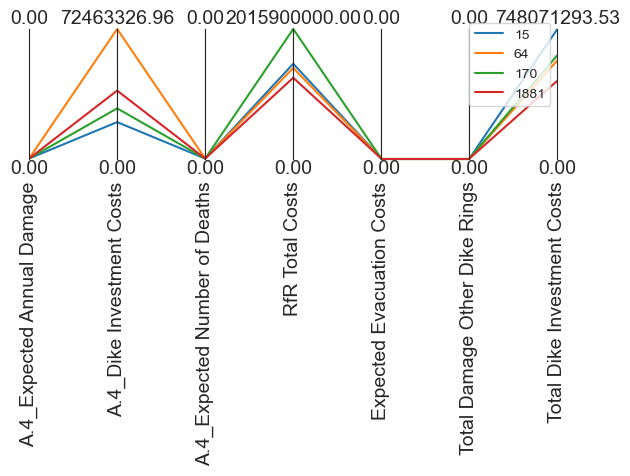

In [139]:
# Prepare the data
data = selected_policies5[relevant_columns]

# Define limits based on the filtered dataframe
limits = parcoords.get_limits(data)

# Set zero limits for specific columns
limits.loc[0, relevant_columns] = 0  # Ensure all relevant columns start at 0

# Set axes of parallel coordinate plots
paraxes = parcoords.ParallelAxes(limits)

# Plot data on axis
paraxes.plot(data)

# Display the plot
plt.legend(data.index)
plt.show()


In [140]:
# Drop results columns
final_policies = selected_policies5.drop([
    'A.4_Expected Annual Damage', 
    'A.4_Dike Investment Costs', 
    'A.4_Expected Number of Deaths', 
    'RfR Total Costs', 
    'Expected Evacuation Costs',
    'Total Damage Other Dike Rings', 
    'Total Dike Investment Costs'
                                  ], axis=1)

# Rename Unnamed: 0 to selected_policy
final_policies.rename(columns= {'Unnamed: 0': 'selected_policy'}, inplace=True)

# Save selected policies to csv
final_policies.to_csv('data/output/MOEA_final_policies.csv')